___

<a href='http://www.pieriandata.com'><img src='Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>

# Multivariate Time Series with LSTM RNN's for Appliance Energy Use Forecasting

**By Drew Sims**

The following project was an exercise project given by Pierian Data in the Python for Time-series Data Science Bootcamp.

**The goal of this project is to use an LSTM RNN to forecast future energy use of appliances within an home via multivariate time series data**

**Energy uses of appliances in a low energy building were tracked with a data interval of 10 min between each collection point. This study occured for 4.5 months. This was measured by a wireless sensor network. The house temperature and humidity conditions were monitored in conjuction with the appliance energy uses. The temperature and humidity conditions were logged every 3.3 minutes. Weather from a nearby airport weather station (Chievres Airport, Belgium) was also downloaded as well to include in this study**

Dataset Download Link: http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

        - appliance abbreviations described in link above

The main difference between Multivariate RNN's and RNN's for Time Series are in Multivariate there is more than 1 column (feature) of data

        What we need to change from a regular RNN:
        
        1.) Input shape of LSTM layer to reflect 2-D structure
        2.) The final dense layer should have a neuron per feature/variable
        
 ARIMA and SARIMA models should be explored first
         - ARIMA based models can work very well on Multivariate Data

**The Steps are as followed:**

**1.)** Import Libraries

**2.)** Import CSV Data

**3.)** Explore Data

**4.)** Visualize Data

**5.)** Train Test Split

**6.)** Scale Data

**7.)** Time Series Generator

**8.)** Create RNN Model

**9.)** Early Stopping

**10.)** Evaluate Model on Test Data

**11.)** Inverse Transform

**12.)** Model Performance Evaluations

**13.)** Save Model

# 1.) Import Libraries

In [1]:
# imported libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# 2.) Import CSV Data

In [2]:
# import data

df = pd.read_csv('C:\\Users\\Drew\\Time_Series_Analysis_Jose_Portilla\\MultiVariate-RNN-with-TensorFlow-and-Keras-master\\DATA\\energydata_complete.csv',
                 index_col='date',infer_datetime_format=True)

# 3.) Explore Data

In [3]:
# Index set to date
# Data starts at January 11th, 2016

df.head(5)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
# Data ends on May 27th, 2016

df.tail(5)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [5]:
# Explore any null values
        # There are no null values present
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 

# 4.) Visualize Data

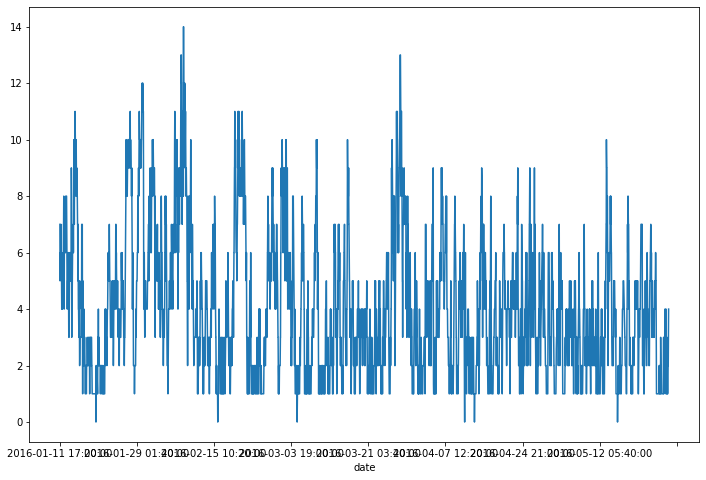

In [6]:
df['Windspeed'].plot(figsize=(12,8))

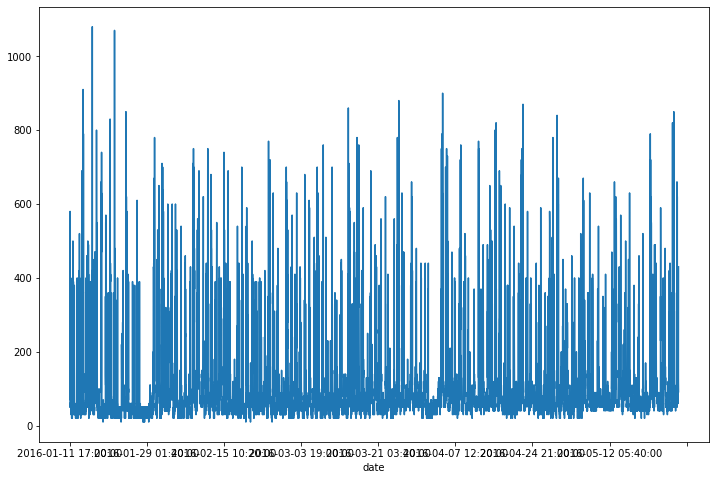

In [7]:
# Dataset appears very noisy
# X-axis overlaps due to the high volume of data present within a short span of time

df['Appliances'].plot(figsize=(12,8))

# 5.) Train Test Split

In [8]:
# Check length of dataset

len(df)

19735

In [9]:
# Only select last month of data since we do not need the entire dataset worth of data to train on (Would require alot of training time)

df = df.loc['2016-05-01':]

In [10]:
# The data has a large amount of decimal places, which is not necessary as we will normalizet the data later. The large amount of decimal places could cause noies
# The data can be rounded to tenths place to have a one decimal point precision

df = df.round(2)

In [11]:
len(df)

3853

In [12]:
# We need to determine the batch size
# Since data is collected every 10 min we can use the formula (144 rows for one day of information):

24*60/10

144.0

In [13]:
test_days = 2

In [14]:
test_ind = test_days*144

In [15]:
test_ind

288

In [16]:
# Train Test Split
        # The test set is the last day of information/data collected
            # We have to use the negative sign since we determined the amount of test days instead of the amount of train days

train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

In [17]:
# Ensure train set is the correct dates of May (1st --> 25th)

train

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.20,38.20,18.39,41.40,23.20,36.40,19.73,37.73,...,19.17,38.20,4.30,763.70,86.00,2.00,40.00,2.20,15.31,15.31
2016-05-01 00:10:00,60,0,21.15,38.17,18.39,41.50,23.13,36.47,19.70,37.66,...,19.13,38.29,4.28,763.72,86.33,2.17,38.17,2.22,11.24,11.24
2016-05-01 00:20:00,50,0,21.13,38.09,18.32,41.50,23.20,36.50,19.70,37.59,...,19.13,38.36,4.27,763.73,86.67,2.33,36.33,2.23,21.81,21.81
2016-05-01 00:30:00,50,0,21.10,38.09,18.29,41.50,23.20,36.50,19.70,37.50,...,19.17,38.50,4.25,763.75,87.00,2.50,34.50,2.25,47.00,47.00
2016-05-01 00:40:00,60,0,21.10,38.03,18.29,41.56,23.20,36.50,19.70,37.50,...,19.17,38.63,4.23,763.77,87.33,2.67,32.67,2.27,8.06,8.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-25 17:20:00,120,0,24.50,37.22,24.13,34.30,25.20,37.64,24.36,38.29,...,21.89,37.03,16.17,756.17,52.67,1.33,31.33,6.43,33.46,33.46
2016-05-25 17:30:00,190,0,24.50,37.16,24.10,34.30,25.20,37.55,24.29,38.16,...,21.89,37.20,16.25,756.15,53.50,1.50,33.50,6.75,0.43,0.43
2016-05-25 17:40:00,160,0,24.50,37.43,24.10,34.43,25.14,37.28,24.29,38.00,...,21.89,37.33,16.33,756.13,54.33,1.67,35.67,7.07,16.67,16.67


# 6.) Scale Data

In [18]:
# import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

In [19]:
# Create a MinMaxScaler instance

MinMaxScale = MinMaxScaler()

In [20]:
# Ignore Warning as it just converts our values to floats
# Fitting training data because in real life situations there would be no test set
        # Finds max value within set

MinMaxScale.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [21]:
# Scales sets by max value

scaled_train = MinMaxScale.transform(train)
scaled_test = MinMaxScale.transform(test)

# 7.) Time Series Generator

In [22]:
# import TimeSeriesGenerator library

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
# define the generator instance

length = 144 # Length of the output sequences (in number of timesetps) (full day of data)
batch_size = 1 # Number of timeseries samples in each batch

# scaled_train for both inputs because it has the same data on the x & y axis
# smaller batch sizes generally work better for RNN's
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length, batch_size=batch_size)

In [24]:
len(scaled_train)

3565

In [25]:
len(generator)

3421

In [26]:
X,y = generator[0]

In [27]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03896104 0.         0.13798978 ... 0.14319527 0.75185111 0.75185111]
Predict this y: 
 [[0.03896104 0.         0.30834753 0.29439421 0.16038492 0.49182278
  0.0140056  0.36627907 0.24142857 0.24364791 0.12650602 0.36276002
  0.12       0.28205572 0.06169297 0.15759185 0.34582624 0.39585974
  0.09259259 0.39649608 0.18852459 0.96052632 0.59210526 0.1
  0.58333333 0.13609467 0.4576746  0.4576746 ]]


# 8.) Create RNN Model

In [28]:
# import model building libraries from keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [29]:
# Check the array shape of 'scaled_train'
# 28 features (columns)
# 3565 rows for each column

scaled_train.shape

(3565, 28)

In [30]:
# create model instance
model = Sequential()

# RNN layer
# 'length' = 144 (one full day of data) as defined in the Time Series Generator Step
# Shape[1] this has to reflect the amount of features being trained (generalized version for any # of features)
        # shape[1] will automatically detect how many features (columsn are in your dataframe)
    
model.add(LSTM(25,input_shape=(length,scaled_train.shape[1])))
          
# Final Prediction (one neuron per feature)
model.add(Dense(scaled_train.shape[1]))
          
# compile model
model.compile(optimizer='adam', loss='mse')

In [31]:
# Check model parameters

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 25)                5400      
_________________________________________________________________
dense (Dense)                (None, 28)                728       
Total params: 6,128
Trainable params: 6,128
Non-trainable params: 0
_________________________________________________________________


# 9.) Early Stopping

In [32]:
# Early stoppage will find the optimal # of epochs for training
# import earlystop library

from tensorflow.keras.callbacks import EarlyStopping

In [33]:
# Create early start instance

early_stop = EarlyStopping(monitor='val_loss',patience=1)

validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length, batch_size=batch_size)

In [34]:
# Fit model to early stoppage
# Only train for 2 epochs due to large training time for the large dataset

model.fit_generator(generator,epochs=2,
                   validation_data=validation_generator,
                   callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/2
3421/3421 [==============================] - 350s 102ms/step - loss: 0.0162 - val_loss: 0.0148
Epoch 2/2
3421/3421 [==============================] - 304s 89ms/step - loss: 0.0091 - val_loss: 0.0118


In [35]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

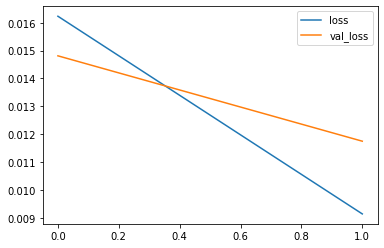

In [36]:
# Plot the loss vs the validation loss
# The plots do not start to converge due to only 2 epochs being trained
        # If more epochs were trained then model might be more optimized, but due to the training data being so large, the
        # training time would be too great for this computer

losses= pd.DataFrame(model.history.history)
losses.plot()

# 10.) Evaluate  Model on Test Data

In [37]:
# Create an instance in which it contains the last full day of data to call the first prediction off of

first_eval_batch = scaled_train[-length:]

In [38]:
# Check the data array structure of the first_eval_batch

first_eval_batch

array([[0.1038961 , 0.        , 0.72231687, ..., 0.53550296, 0.15909546,
        0.15909546],
       [0.11688312, 0.        , 0.73424191, ..., 0.52662722, 0.40344207,
        0.40344207],
       [0.11688312, 0.        , 0.73424191, ..., 0.51775148, 0.20452271,
        0.20452271],
       ...,
       [0.18181818, 0.        , 0.70017036, ..., 0.50118343, 0.33340004,
        0.33340004],
       [0.09090909, 0.        , 0.70017036, ..., 0.51952663, 0.78747248,
        0.78747248],
       [0.1038961 , 0.        , 0.70017036, ..., 0.53846154, 0.77286372,
        0.77286372]])

In [39]:
# Reformat the shape of the evaluation batch to fit inot the model (to make it have three sets of brackets around the dataset array)
# Shape[1] to auto adjust for all columns within the dataframe

first_eval_batch = first_eval_batch.reshape((1, length, scaled_train.shape[1]))

In [40]:
# predict from the model

model.predict(first_eval_batch)

array([[ 0.09650834,  0.03933383,  0.62576026,  0.40431145,  0.55848914,
         0.41144952,  0.40604466,  0.42512864,  0.6788706 ,  0.36402375,
         0.36132473,  0.3498669 ,  0.6463668 , -0.01384262,  0.6031643 ,
         0.34174997,  0.5308778 ,  0.3254131 ,  0.5291924 ,  0.3777815 ,
         0.658566  ,  0.44192255,  0.39107597,  0.254799  ,  0.5546135 ,
         0.5336578 ,  0.45905498,  0.45397288]], dtype=float32)

In [41]:
scaled_test[0]

array([0.19480519, 0.        , 0.70017036, 0.3920434 , 0.53007217,
       0.41064526, 0.40616246, 0.41913319, 0.72714286, 0.4115245 ,
       0.30722892, 0.36445121, 0.66777778, 0.        , 0.61119082,
       0.39840637, 0.51618399, 0.32953105, 0.53703704, 0.34024896,
       0.6057377 , 0.52631579, 0.41881579, 0.2       , 0.55283333,
       0.53372781, 0.76305783, 0.76305783])

In [42]:
# Predict on entire test set (Forecast into the future using RNN Model)

# Want to ensure all the columns are included
n_features = scaled_train.shape[1]

# Create empty list to store the test predictions in
test_predictions = []

# Last length points from training set (1 full day or 144 rows of data)
first_eval_batch = scaled_train[-length:]

#Reshape this to the format the RNN wants (same as TimeSeriesGenerator)
# This is the last 144 points that will be used for more predictions
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # One timestep ahead of historical 144 points
    current_pred = model.predict(current_batch)[0]
    
    # store predictions
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value within array
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [43]:
# Check the data structure and values of the predicted values

test_predictions

[array([ 0.09650834,  0.03933383,  0.62576026,  0.40431145,  0.55848914,
         0.41144952,  0.40604466,  0.42512864,  0.6788706 ,  0.36402375,
         0.36132473,  0.3498669 ,  0.6463668 , -0.01384262,  0.6031643 ,
         0.34174997,  0.5308778 ,  0.3254131 ,  0.5291924 ,  0.3777815 ,
         0.658566  ,  0.44192255,  0.39107597,  0.254799  ,  0.5546135 ,
         0.5336578 ,  0.45905498,  0.45397288], dtype=float32),
 array([ 0.09046383,  0.04880485,  0.62065446,  0.4029798 ,  0.56523615,
         0.40765575,  0.39383385,  0.42559496,  0.68201125,  0.35688552,
         0.37367553,  0.33778945,  0.65748495, -0.01891394,  0.60086185,
         0.33469647,  0.5271544 ,  0.32204914,  0.5323533 ,  0.373838  ,
         0.6617715 ,  0.4262357 ,  0.37613496,  0.2742132 ,  0.5517058 ,
         0.52271616,  0.45872465,  0.44139624], dtype=float32),
 array([ 0.08459042,  0.05531251,  0.6201748 ,  0.40102896,  0.57178557,
         0.40439323,  0.38320765,  0.42496014,  0.6855208 ,  0.351352

In [44]:
# Check the data structure and values of the scaled test set values

scaled_test

array([[0.19480519, 0.        , 0.70017036, ..., 0.53372781, 0.76305783,
        0.76305783],
       [0.37662338, 0.        , 0.70017036, ..., 0.52840237, 0.62337402,
        0.62337402],
       [0.12987013, 0.        , 0.70017036, ..., 0.52366864, 0.08785271,
        0.08785271],
       ...,
       [0.32467532, 0.33333333, 0.87052811, ..., 0.86804734, 0.58415049,
        0.58415049],
       [0.51948052, 0.33333333, 0.87052811, ..., 0.86568047, 0.12627577,
        0.12627577],
       [0.53246753, 0.33333333, 0.87052811, ..., 0.86390533, 0.68260957,
        0.68260957]])

# 11.) Inverse Transformations

In [45]:
# Inverse transform the values from their scaled versions to their original values

true_predictions = MinMaxScale.inverse_transform(test_predictions)

In [46]:
# Check the values to ensure they are in the ballpark of the what they should be to see if the Inverse Transform worked

true_predictions

array([[94.31142107,  1.18001495, 24.06321271, ...,  7.61881664,
        22.94897719, 22.69502462],
       [89.65715066,  1.46414537, 24.0332417 , ...,  7.43390318,
        22.93247065, 22.06656993],
       [85.1346235 ,  1.65937532, 24.03042622, ...,  7.27491307,
        22.96905488, 21.7494401 ],
       ...,
       [67.82081846, -2.36693099, 24.39733201, ..., -0.97119006,
        20.79568273, 20.67252258],
       [68.34018141, -2.4600099 , 24.40244935, ..., -1.00775137,
        20.75282441, 20.68462995],
       [68.9373976 , -2.54988536, 24.40717237, ..., -1.04516919,
        20.71153126, 20.69405673]])

In [47]:
# Visualize the test set dataframe

test

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-25 18:10:00,170,0,24.50,37.86,24.00,34.27,25.00,36.70,24.29,37.79,...,22.00,37.23,16.48,756.1,55.83,2.00,38.17,7.62,38.14,38.14
2016-05-25 18:20:00,310,0,24.50,37.30,23.86,34.33,24.94,36.67,24.29,37.79,...,22.00,37.36,16.47,756.1,55.67,2.00,36.33,7.53,31.16,31.16
2016-05-25 18:30:00,120,0,24.50,36.96,23.73,34.33,24.85,36.50,24.29,37.79,...,22.03,37.39,16.45,756.1,55.50,2.00,34.50,7.45,4.40,4.40
2016-05-25 18:40:00,120,0,24.50,37.00,23.70,34.40,24.84,36.45,24.29,37.90,...,22.10,37.72,16.43,756.1,55.33,2.00,32.67,7.37,27.12,27.12
2016-05-25 18:50:00,120,0,24.49,37.07,23.68,34.52,24.84,36.49,24.28,37.93,...,22.10,37.81,16.42,756.1,55.17,2.00,30.83,7.28,10.27,10.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.57,46.56,25.89,42.03,27.20,41.16,24.70,45.59,...,23.20,46.79,22.73,755.2,55.67,3.33,23.67,13.33,43.10,43.10
2016-05-27 17:30:00,90,0,25.50,46.50,25.75,42.08,27.13,41.22,24.70,45.59,...,23.20,46.79,22.60,755.2,56.00,3.50,24.50,13.30,49.28,49.28
2016-05-27 17:40:00,270,10,25.50,46.60,25.63,42.77,27.05,41.69,24.70,45.73,...,23.20,46.79,22.47,755.2,56.33,3.67,25.33,13.27,29.20,29.20


In [48]:
# Create a dataframe of the predictions values

true_predictions = pd.DataFrame(data=true_predictions,columns=test.columns)

In [49]:
# Visualize the forecasted predictions

true_predictions

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,94.311421,1.180015,24.063213,38.199212,24.354360,34.297047,24.999159,36.813434,23.952094,36.743083,...,21.957639,38.044081,17.769010,754.175834,53.721774,2.547990,38.276808,7.618817,22.948977,22.695025
1,89.657151,1.464145,24.033242,38.162391,24.438495,34.169463,24.911974,36.822257,23.974079,36.585757,...,21.974708,37.958546,17.847224,753.818174,52.586257,2.742132,38.102347,7.433903,22.932471,22.066570
2,85.134623,1.659375,24.030426,38.108451,24.520166,34.059744,24.836103,36.810246,23.998646,36.463806,...,22.008747,37.877625,18.084467,753.520938,51.342178,2.939166,37.855966,7.274913,22.969055,21.749440
3,81.798164,1.806347,24.033036,38.064353,24.605819,33.907097,24.772133,36.770725,24.019738,36.381148,...,22.046656,37.778080,18.363755,753.273754,49.938966,3.140590,37.577943,7.122755,22.983646,21.471386
4,79.348253,1.927750,24.037985,38.018566,24.694636,33.728679,24.719374,36.717839,24.039858,36.315670,...,22.087826,37.657745,18.661365,753.066012,48.433321,3.342002,37.303653,6.973775,22.972787,21.212380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,67.004867,-2.169987,24.386067,32.800634,22.674133,30.072924,23.482019,34.308484,24.013278,31.030682,...,22.350105,32.206962,14.147221,755.180273,30.436698,6.205829,38.452411,-0.899410,20.886035,20.640476
284,67.376667,-2.270354,24.391858,32.758434,22.642919,30.099668,23.508001,34.253355,24.017178,31.015177,...,22.381940,32.236734,13.955360,755.059301,30.829955,6.248311,38.275263,-0.935182,20.840103,20.657787
285,67.820818,-2.366931,24.397332,32.719383,22.612841,30.130248,23.535181,34.197467,24.021287,31.002674,...,22.414883,32.268274,13.760981,754.938922,31.227324,6.291510,38.093338,-0.971190,20.795683,20.672523
286,68.340181,-2.460010,24.402449,32.683491,22.583869,30.164653,23.563447,34.140779,24.025569,30.993066,...,22.448916,32.301378,13.563771,754.819209,31.628642,6.335524,37.906853,-1.007751,20.752824,20.684630


# 12.) Model Performance Evaluations

1.) To evaluate model you could use RMSE to compare column by column

2.) To compare all features you could use weighted average of the RMSE across all the features

In [50]:
# import RMSE library

from statsmodels.tools.eval_measures import rmse

In [51]:
# Compare RMSE of appliances

error_appliances = rmse(test['Appliances'],true_predictions['Appliances'])

In [52]:
error_appliances

151.302077203942

In [53]:
test['Appliances'].mean()

137.84722222222223

This error is very large due to the training of only 2 epochs. From the plot of the model it is apparent that the loss and validation loss do not follow correspondingly. This could be fixed by either a.) adjusting the LSTM parameter of the RNN model dense layer, or b.) adjusting the amount of epochs for more training time. 

The dataset was very large making it difficult with different parameters. If there weren't any computational restraints of training time, different LSTM and Epoch variables would be experiemented with to reduce validation loss.

# 13.) Save Model

In [54]:
from tensorflow.keras.models import load_model

In [55]:
model.save("multivariate.h5")